In [17]:
#use the stepwise formula to try to calculate N and Ms for a given number of steps
import sympy as sp
from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt
import numpy as np
import warnings
import scipy
import time
plt.style.use('dark_background')


In [18]:
ai = sp.Symbol("a_i")
M = sp.Symbol("M")
N = sp.Symbol("N")

aip1 = ai*(1-(2*M/N*(1-(sp.sqrt(1/(M*(ai**2))-1)*sp.sqrt(N/M-1)))))
#aip1 = aip1.simplify()
display(Math("a_{i+1} = " + sp.latex(aip1)))

<IPython.core.display.Math object>

In [19]:
"""equationMaps = []
NRange = 200
MRange = 20
Ns = np.linspace(1, NRange, NRange)
Ms = np.linspace(1, MRange, MRange)
Ns, Ms = np.meshgrid(Ns, Ms)

for stepCnt in range(15):
    #define formula recursively
    #a0 = 1/sqrt(N)
    #a{stepCnt+1} = 1/sqrt(M)
    a = [1/sp.sqrt(N)]
    for i in range(stepCnt+1):
        form = aip1.subs(ai, a[i])
        a.append(form)
    #set up the equation with a[-1] = 1/sqrt(M)
    eq = a[-1] - 1/sp.sqrt(M)
    if stepCnt <= 1:
        display(Math(sp.latex(eq) + " = 0"))
    else:
        print("eq too long to display...")
    #plot the value of the equation for different values of N and M
    
    #make eq a function of N and M
    with warnings.catch_warnings(record=True) as warn:
        warnings.simplefilter("always")
        eqs = sp.lambdify((N, M), eq, "numpy")
        evaluated = eqs(Ns, Ms)
        warnMsgs = []
        for w in warn:
            if str(w.message) not in warnMsgs:
                warnMsgs.append(str(w.message))
                print(w.message)
            assert issubclass(w.category, RuntimeWarning)
    #make sure the values are between -1 and 1
    evaluated[evaluated < -1] = -1
    evaluated[evaluated > 1] = 1
    #plot with seismic colormap
    plt.figure()
    toPlot = evaluated#(evaluated+1)/2
    #contourplot with minimum at -1 and maximum at 1
    plt.contourf(Ns, Ms, toPlot, 100, cmap="seismic", vmin=-1, vmax=1)
    cMap = plt.cm.get_cmap("seismic")
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=-1, vmax=1), cmap=cMap), ticks=[-1,0,1])
    cbar.set_label('fault', rotation=0, labelpad=20)
    #cbar = plt.colorbar(plt.cm.ScalarMappable(cmap="PiYG"))
    #insert a N=M line
    plt.plot([1, NRange], [1, NRange], color="black", linestyle="--", label="N=M")
    #plot
    plt.legend()
    plt.xlim(1, NRange)
    plt.ylim(1, MRange)
    plt.title("stepCnt = " + str(stepCnt+1))
    plt.xlabel("N")
    plt.ylabel("M")
    plt.show()
    #save the equation map
    equationMaps.append(evaluated)"""

'equationMaps = []\nNRange = 200\nMRange = 20\nNs = np.linspace(1, NRange, NRange)\nMs = np.linspace(1, MRange, MRange)\nNs, Ms = np.meshgrid(Ns, Ms)\n\nfor stepCnt in range(15):\n    #define formula recursively\n    #a0 = 1/sqrt(N)\n    #a{stepCnt+1} = 1/sqrt(M)\n    a = [1/sp.sqrt(N)]\n    for i in range(stepCnt+1):\n        form = aip1.subs(ai, a[i])\n        a.append(form)\n    #set up the equation with a[-1] = 1/sqrt(M)\n    eq = a[-1] - 1/sp.sqrt(M)\n    if stepCnt <= 1:\n        display(Math(sp.latex(eq) + " = 0"))\n    else:\n        print("eq too long to display...")\n    #plot the value of the equation for different values of N and M\n    \n    #make eq a function of N and M\n    with warnings.catch_warnings(record=True) as warn:\n        warnings.simplefilter("always")\n        eqs = sp.lambdify((N, M), eq, "numpy")\n        evaluated = eqs(Ns, Ms)\n        warnMsgs = []\n        for w in warn:\n            if str(w.message) not in warnMsgs:\n                warnMsgs.append(

In [20]:
def locateOptimumLineBySlicing(Ns,Ms,mapAtStep):
    MSlices = Ms[:,0]
    print("MSlices:", MSlices)
    plot = False
    if plot: plt.figure()
    foundXs = []
    foundYs = []
    lineCnt = 0
    endM = 0
    for i,M in enumerate(MSlices):
        #find values closest to 0 for M
        mapSlice = mapAtStep[i]
        #find valleys of abs(mapSlice)
        absSlice = np.abs(mapSlice)
        valleys = np.where(np.diff(np.sign(np.diff(absSlice))) > 0)[0] + 1
        #remove valley points whose abs value is too high
        absSlice = absSlice[valleys]
        valleys = valleys[absSlice < 0.01]
        if plot:
            #plot found valleys
            plt.plot(Ns[i], mapSlice)
            #get color of last line
            color = plt.gca().lines[-1].get_color()
            plt.plot(Ns[i][valleys], mapSlice[valleys], "x", color=color)
        X = Ns[i][valleys]
        if i == 0: lineCnt = len(X)
        if len(X) != lineCnt:#finished range
            endM = MSlices[i-1]
            break
        foundXs.append(X)
        foundYs.append(M*np.ones(len(valleys)))
    if plot: plt.show()
    foundXs = np.transpose(np.array(foundXs))
    foundYs = np.transpose(np.array(foundYs))
    optimums = []
    for i in range(len(foundXs)):
        #find optimum for each row
        optimums.append([foundXs[i], foundYs[i]])
    return optimums, endM

<IPython.core.display.Math object>

[20, 20]
evalPoint: [8, 8]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1, 1]
Upper right: [15, 15]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([ 4,  8, 12]), array([1., 2., 3.])]], 3)
Evaluationpoints: [[23, 1], [23, 5.75]]
[35, 35]
evalPoint: [23, 5.75]
Lower left: [16.0, -1.25]
Upper right: [30.0, 12.75]
Lower left: [17.866666666666667, 0.6166666666666667]
Upper right: [30.0, 12.75]
Lower left: [17, 0]
Upper right: [30, 12]
evalPoint: [23, 1]
Lower left: [16.0, -6.0]
Upper right: [30.0, 8.0]
Lower left: [22.53333333333333, 0.5333333333333332]
Upper right: [30.0, 8.0]
Lower left: [22, 0]
Upper right: [30, 0]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([ 4,  8, 12]), array([1., 2., 3.])]], 3)
Evaluationpoints: [[38, 1], [38, 9.5]]
[50, 50]
evalPoint: [38, 9.5]
Lower left: [31.0, 2.5]
Upper right: [45.0, 16.5]
Lower left: [31.0, 2.5]
Upper right: [45

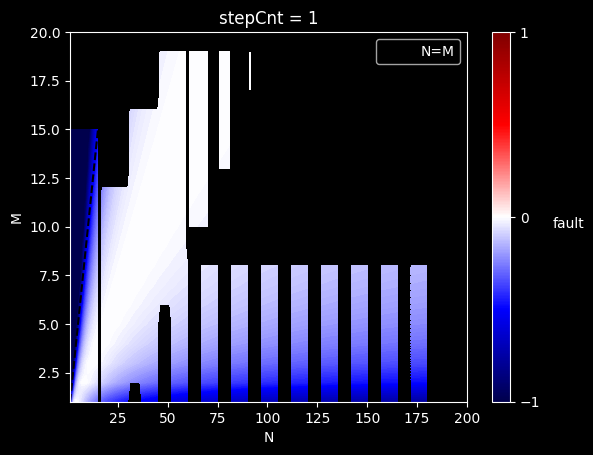

<IPython.core.display.Math object>

[20, 20]
evalPoint: [8, 8]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1, 1]
Upper right: [15, 15]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([10]), array([1.])]], 1)
Evaluationpoints: [[23, 1], [23, nan]]
[35, 35]
evalPoint: [23, nan]
Lower left: [16.0, nan]
Upper right: [30.0, nan]
evalPoint: [23, 1]
Lower left: [16.0, -6.0]
Upper right: [30.0, 8.0]
Lower left: [22.53333333333333, 0.5333333333333332]
Upper right: [30.0, 8.0]
Lower left: [22, 0]
Upper right: [30, 8]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([10]), array([1.])]], 1)
Evaluationpoints: [[38, 1], [38, nan]]
[50, 50]
evalPoint: [38, nan]
Lower left: [31.0, nan]
Upper right: [45.0, nan]
evalPoint: [38, 1]
Lower left: [31.0, -6.0]
Upper right: [45.0, 8.0]
Lower left: [37.53333333333333, 0.5333333333333332]
Upper right: [45.0, 8.0]
Lower left: [37, 0]
Upper right: [45, 8]
MSlices: [ 1  

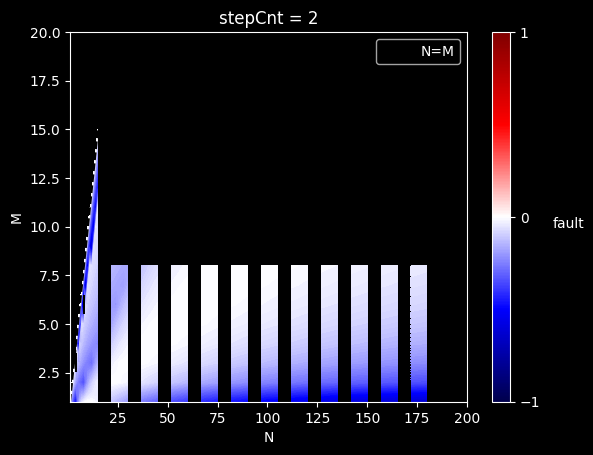

eq too long to display...
[20, 20]
evalPoint: [8, 8]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1, 1]
Upper right: [15, 15]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([ 4,  8, 12]), array([1., 2., 3.])]], 3)
Evaluationpoints: [[23, 1], [23, 5.75]]
[35, 35]
evalPoint: [23, 5.75]
Lower left: [16.0, -1.25]
Upper right: [30.0, 12.75]
Lower left: [17.866666666666667, 0.6166666666666667]
Upper right: [30.0, 12.75]
Lower left: [17, 0]
Upper right: [30, 12]
evalPoint: [23, 1]
Lower left: [16.0, -6.0]
Upper right: [30.0, 8.0]
Lower left: [22.53333333333333, 0.5333333333333332]
Upper right: [30.0, 8.0]
Lower left: [22, 0]
Upper right: [30, 0]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([4]), array([1.])], [array([20]), array([1.])]], 1)
Evaluationpoints: [[38, 1], [38, nan], [38, nan]]
[50, 50]
evalPoint: [38, nan]
Lower left: [31.0, nan]
Upper right: [45.0

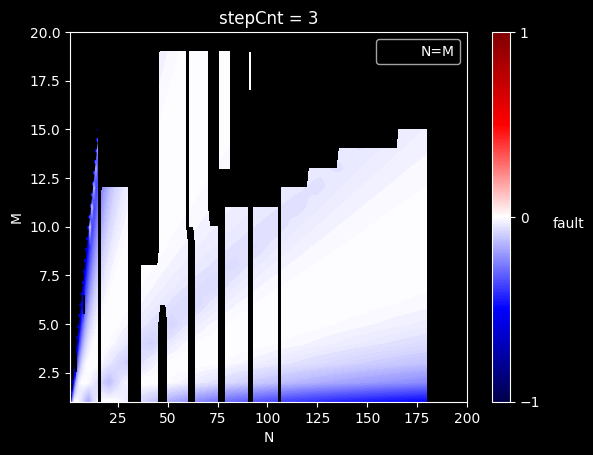

eq too long to display...
[20, 20]
evalPoint: [8, 8]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1, 1]
Upper right: [15, 15]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([10]), array([1.])]], 1)
Evaluationpoints: [[23, 1], [23, nan]]
[35, 35]
evalPoint: [23, nan]
Lower left: [16.0, nan]
Upper right: [30.0, nan]
evalPoint: [23, 1]
Lower left: [16.0, -6.0]
Upper right: [30.0, 8.0]
Lower left: [22.53333333333333, 0.5333333333333332]
Upper right: [30.0, 8.0]
Lower left: [22, 0]
Upper right: [30, 8]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([10]), array([1.])]], 1)
Evaluationpoints: [[38, 1], [38, nan]]
[50, 50]
evalPoint: [38, nan]
Lower left: [31.0, nan]
Upper right: [45.0, nan]
evalPoint: [38, 1]
Lower left: [31.0, -6.0]
Upper right: [45.0, 8.0]
Lower left: [37.53333333333333, 0.5333333333333332]
Upper right: [45.0, 8.0]
Lower left: [37, 0]
Upper rig

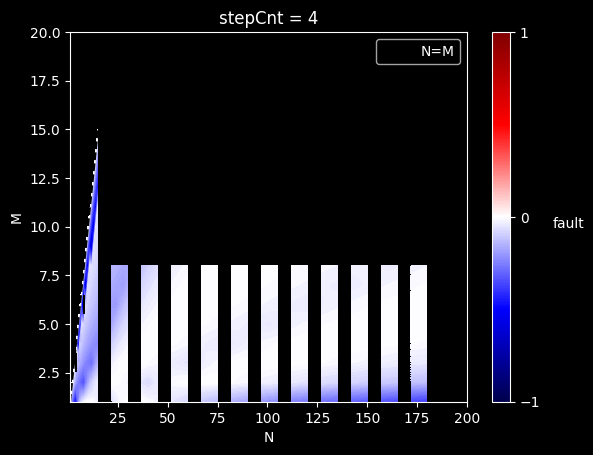

eq too long to display...
[20, 20]
evalPoint: [8, 8]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1, 1]
Upper right: [15, 15]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([ 4,  8, 12]), array([1., 2., 3.])]], 3)
Evaluationpoints: [[23, 1], [23, 5.75]]
[35, 35]
evalPoint: [23, 5.75]
Lower left: [16.0, -1.25]
Upper right: [30.0, 12.75]
Lower left: [17.866666666666667, 0.6166666666666667]
Upper right: [30.0, 12.75]
Lower left: [17, 0]
Upper right: [30, 12]
evalPoint: [23, 1]
Lower left: [16.0, -6.0]
Upper right: [30.0, 8.0]
Lower left: [22.53333333333333, 0.5333333333333332]
Upper right: [30.0, 8.0]
Lower left: [22, 0]
Upper right: [30, 0]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([4]), array([1.])], [array([20]), array([1.])]], 1)
Evaluationpoints: [[38, 1], [38, nan], [38, nan]]
[50, 50]
evalPoint: [38, nan]
Lower left: [31.0, nan]
Upper right: [45.0

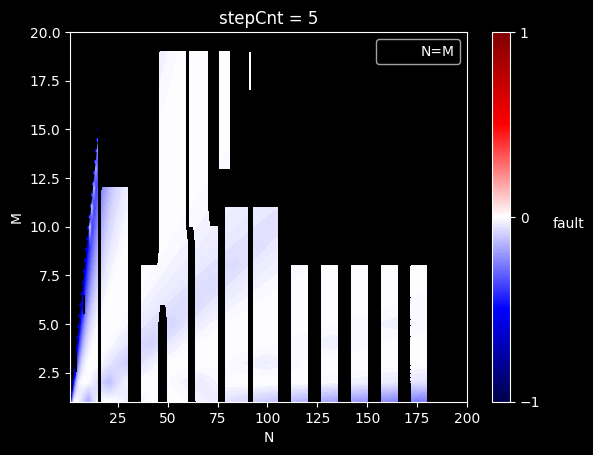

eq too long to display...
[20, 20]
evalPoint: [8, 8]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1, 1]
Upper right: [15, 15]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([10]), array([1.])]], 1)
Evaluationpoints: [[23, 1], [23, nan]]
[35, 35]
evalPoint: [23, nan]
Lower left: [16.0, nan]
Upper right: [30.0, nan]
evalPoint: [23, 1]
Lower left: [16.0, -6.0]
Upper right: [30.0, 8.0]
Lower left: [22.53333333333333, 0.5333333333333332]
Upper right: [30.0, 8.0]
Lower left: [22, 0]
Upper right: [30, 8]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([10]), array([1.])]], 1)
Evaluationpoints: [[38, 1], [38, nan]]
[50, 50]
evalPoint: [38, nan]
Lower left: [31.0, nan]
Upper right: [45.0, nan]
evalPoint: [38, 1]
Lower left: [31.0, -6.0]
Upper right: [45.0, 8.0]
Lower left: [37.53333333333333, 0.5333333333333332]
Upper right: [45.0, 8.0]
Lower left: [37, 0]
Upper rig

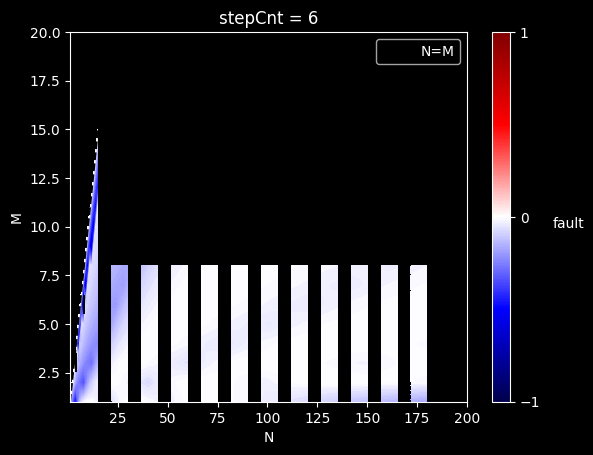

eq too long to display...
[20, 20]
evalPoint: [8, 8]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1, 1]
Upper right: [15, 15]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([ 4,  8, 12]), array([1., 2., 3.])]], 3)
Evaluationpoints: [[23, 1], [23, 5.75]]
[35, 35]
evalPoint: [23, 5.75]
Lower left: [16.0, -1.25]
Upper right: [30.0, 12.75]
Lower left: [17.866666666666667, 0.6166666666666667]
Upper right: [30.0, 12.75]
Lower left: [17, 0]
Upper right: [30, 12]
evalPoint: [23, 1]
Lower left: [16.0, -6.0]
Upper right: [30.0, 8.0]
Lower left: [22.53333333333333, 0.5333333333333332]
Upper right: [30.0, 8.0]
Lower left: [22, 0]
Upper right: [30, 0]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([4]), array([1.])], [array([20]), array([1.])]], 1)
Evaluationpoints: [[38, 1], [38, nan], [38, nan]]
[50, 50]
evalPoint: [38, nan]
Lower left: [31.0, nan]
Upper right: [45.0

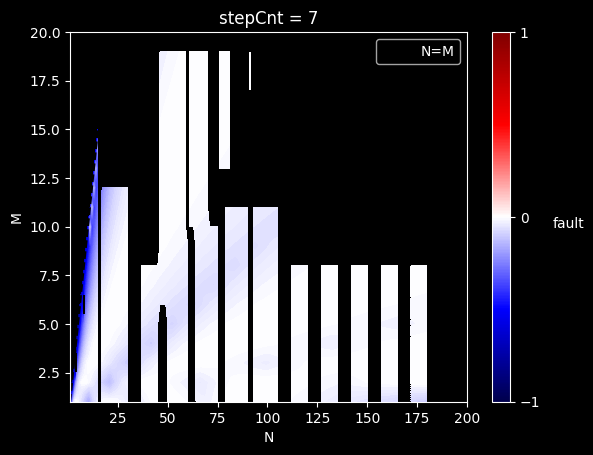

eq too long to display...
[20, 20]
evalPoint: [8, 8]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1, 1]
Upper right: [15, 15]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([10]), array([1.])]], 1)
Evaluationpoints: [[23, 1], [23, nan]]
[35, 35]
evalPoint: [23, nan]
Lower left: [16.0, nan]
Upper right: [30.0, nan]
evalPoint: [23, 1]
Lower left: [16.0, -6.0]
Upper right: [30.0, 8.0]
Lower left: [22.53333333333333, 0.5333333333333332]
Upper right: [30.0, 8.0]
Lower left: [22, 0]
Upper right: [30, 8]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([10]), array([1.])]], 1)
Evaluationpoints: [[38, 1], [38, nan]]
[50, 50]
evalPoint: [38, nan]
Lower left: [31.0, nan]
Upper right: [45.0, nan]
evalPoint: [38, 1]
Lower left: [31.0, -6.0]
Upper right: [45.0, 8.0]
Lower left: [37.53333333333333, 0.5333333333333332]
Upper right: [45.0, 8.0]
Lower left: [37, 0]
Upper rig

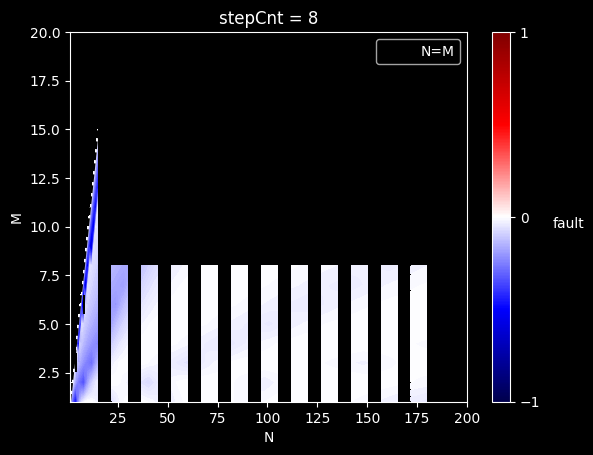

eq too long to display...
[20, 20]
evalPoint: [8, 8]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1, 1]
Upper right: [15, 15]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([ 4,  8, 12]), array([1., 2., 3.])]], 3)
Evaluationpoints: [[23, 1], [23, 5.75]]
[35, 35]
evalPoint: [23, 5.75]
Lower left: [16.0, -1.25]
Upper right: [30.0, 12.75]
Lower left: [17.866666666666667, 0.6166666666666667]
Upper right: [30.0, 12.75]
Lower left: [17, 0]
Upper right: [30, 12]
evalPoint: [23, 1]
Lower left: [16.0, -6.0]
Upper right: [30.0, 8.0]
Lower left: [22.53333333333333, 0.5333333333333332]
Upper right: [30.0, 8.0]
Lower left: [22, 0]
Upper right: [30, 0]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([4]), array([1.])], [array([20]), array([1.])]], 1)
Evaluationpoints: [[38, 1], [38, nan], [38, nan]]
[50, 50]
evalPoint: [38, nan]
Lower left: [31.0, nan]
Upper right: [45.0

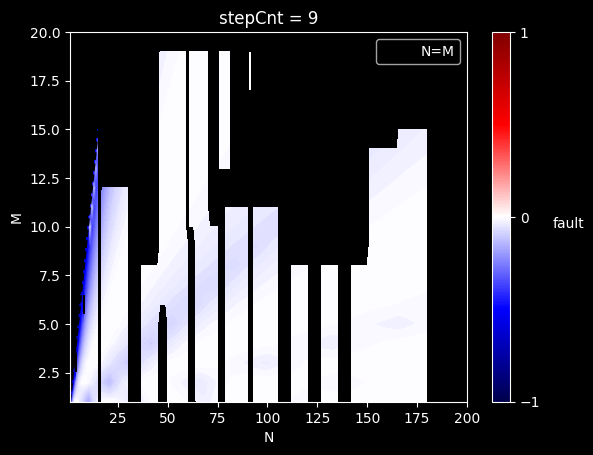

eq too long to display...
[20, 20]
evalPoint: [8, 8]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1, 1]
Upper right: [15, 15]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([10]), array([1.])]], 1)
Evaluationpoints: [[23, 1], [23, nan]]
[35, 35]
evalPoint: [23, nan]
Lower left: [16.0, nan]
Upper right: [30.0, nan]
evalPoint: [23, 1]
Lower left: [16.0, -6.0]
Upper right: [30.0, 8.0]
Lower left: [22.53333333333333, 0.5333333333333332]
Upper right: [30.0, 8.0]
Lower left: [22, 0]
Upper right: [30, 8]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([10]), array([1.])]], 1)
Evaluationpoints: [[38, 1], [38, nan]]
[50, 50]
evalPoint: [38, nan]
Lower left: [31.0, nan]
Upper right: [45.0, nan]
evalPoint: [38, 1]
Lower left: [31.0, -6.0]
Upper right: [45.0, 8.0]
Lower left: [37.53333333333333, 0.5333333333333332]
Upper right: [45.0, 8.0]
Lower left: [37, 0]
Upper rig

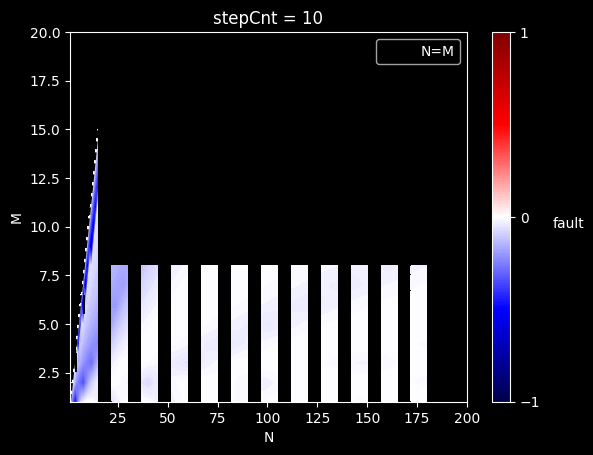

eq too long to display...
[20, 20]
evalPoint: [8, 8]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1, 1]
Upper right: [15, 15]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([ 4,  8, 12]), array([1., 2., 3.])]], 3)
Evaluationpoints: [[23, 1], [23, 5.75]]
[35, 35]
evalPoint: [23, 5.75]
Lower left: [16.0, -1.25]
Upper right: [30.0, 12.75]
Lower left: [17.866666666666667, 0.6166666666666667]
Upper right: [30.0, 12.75]
Lower left: [17, 0]
Upper right: [30, 12]
evalPoint: [23, 1]
Lower left: [16.0, -6.0]
Upper right: [30.0, 8.0]
Lower left: [22.53333333333333, 0.5333333333333332]
Upper right: [30.0, 8.0]
Lower left: [22, 0]
Upper right: [30, 0]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([4]), array([1.])], [array([20]), array([1.])]], 1)
Evaluationpoints: [[38, 1], [38, nan], [38, nan]]
[50, 50]
evalPoint: [38, nan]
Lower left: [31.0, nan]
Upper right: [45.0

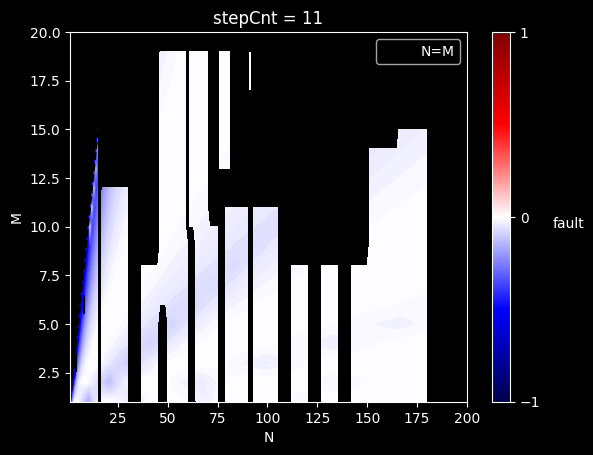

eq too long to display...
[20, 20]
evalPoint: [8, 8]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1, 1]
Upper right: [15, 15]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([10]), array([1.])]], 1)
Evaluationpoints: [[23, 1], [23, nan]]
[35, 35]
evalPoint: [23, nan]
Lower left: [16.0, nan]
Upper right: [30.0, nan]
evalPoint: [23, 1]
Lower left: [16.0, -6.0]
Upper right: [30.0, 8.0]
Lower left: [22.53333333333333, 0.5333333333333332]
Upper right: [30.0, 8.0]
Lower left: [22, 0]
Upper right: [30, 8]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([10]), array([1.])]], 1)
Evaluationpoints: [[38, 1], [38, nan]]
[50, 50]
evalPoint: [38, nan]
Lower left: [31.0, nan]
Upper right: [45.0, nan]
evalPoint: [38, 1]
Lower left: [31.0, -6.0]
Upper right: [45.0, 8.0]
Lower left: [37.53333333333333, 0.5333333333333332]
Upper right: [45.0, 8.0]
Lower left: [37, 0]
Upper rig

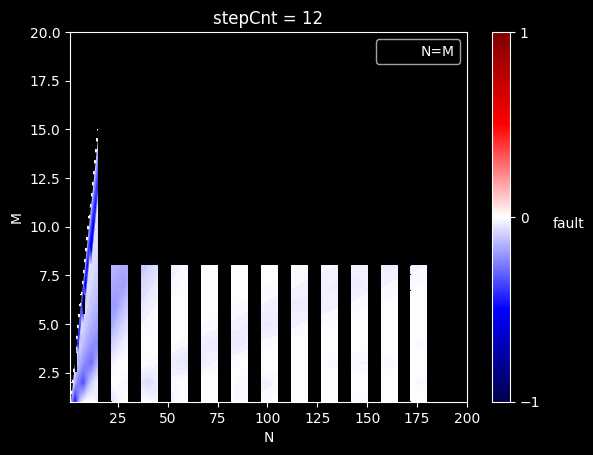

eq too long to display...
[20, 20]
evalPoint: [8, 8]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1, 1]
Upper right: [15, 15]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([ 4,  8, 12]), array([1., 2., 3.])]], 3)
Evaluationpoints: [[23, 1], [23, 5.75]]
[35, 35]
evalPoint: [23, 5.75]
Lower left: [16.0, -1.25]
Upper right: [30.0, 12.75]
Lower left: [17.866666666666667, 0.6166666666666667]
Upper right: [30.0, 12.75]
Lower left: [17, 0]
Upper right: [30, 12]
evalPoint: [23, 1]
Lower left: [16.0, -6.0]
Upper right: [30.0, 8.0]
Lower left: [22.53333333333333, 0.5333333333333332]
Upper right: [30.0, 8.0]
Lower left: [22, 0]
Upper right: [30, 0]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([4]), array([1.])], [array([20]), array([1.])]], 1)
Evaluationpoints: [[38, 1], [38, nan], [38, nan]]
[50, 50]
evalPoint: [38, nan]
Lower left: [31.0, nan]
Upper right: [45.0

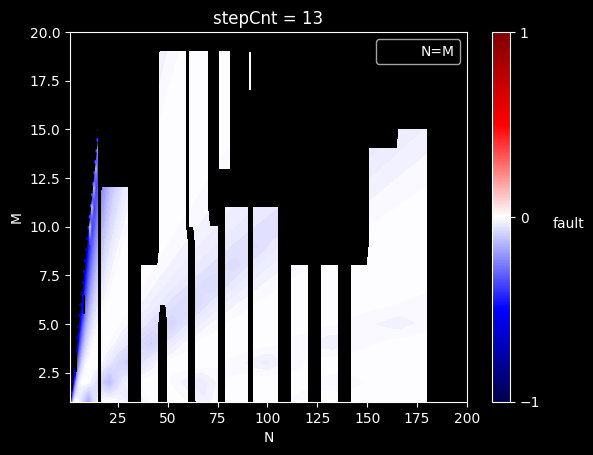

eq too long to display...
[20, 20]
evalPoint: [8, 8]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1, 1]
Upper right: [15, 15]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([10]), array([1.])]], 1)
Evaluationpoints: [[23, 1], [23, nan]]
[35, 35]
evalPoint: [23, nan]
Lower left: [16.0, nan]
Upper right: [30.0, nan]
evalPoint: [23, 1]
Lower left: [16.0, -6.0]
Upper right: [30.0, 8.0]
Lower left: [22.53333333333333, 0.5333333333333332]
Upper right: [30.0, 8.0]
Lower left: [22, 0]
Upper right: [30, 8]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([10]), array([1.])]], 1)
Evaluationpoints: [[38, 1], [38, nan]]
[50, 50]
evalPoint: [38, nan]
Lower left: [31.0, nan]
Upper right: [45.0, nan]
evalPoint: [38, 1]
Lower left: [31.0, -6.0]
Upper right: [45.0, 8.0]
Lower left: [37.53333333333333, 0.5333333333333332]
Upper right: [45.0, 8.0]
Lower left: [37, 0]
Upper rig

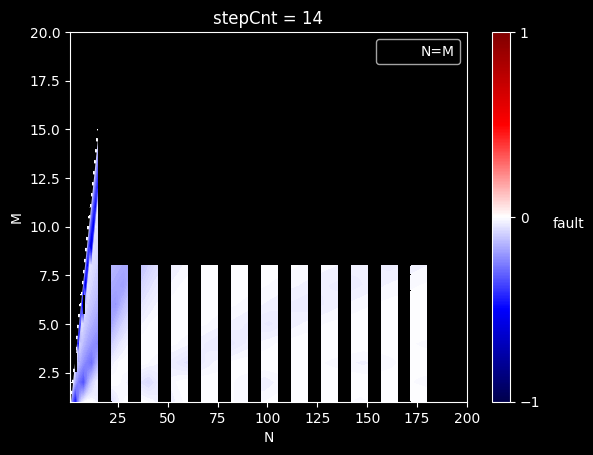

eq too long to display...
[20, 20]
evalPoint: [8, 8]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1.0, 1.0]
Upper right: [15.0, 15.0]
Lower left: [1, 1]
Upper right: [15, 15]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([ 4,  8, 12]), array([1., 2., 3.])]], 3)
Evaluationpoints: [[23, 1], [23, 5.75]]
[35, 35]
evalPoint: [23, 5.75]
Lower left: [16.0, -1.25]
Upper right: [30.0, 12.75]
Lower left: [17.866666666666667, 0.6166666666666667]
Upper right: [30.0, 12.75]
Lower left: [17, 0]
Upper right: [30, 12]
evalPoint: [23, 1]
Lower left: [16.0, -6.0]
Upper right: [30.0, 8.0]
Lower left: [22.53333333333333, 0.5333333333333332]
Upper right: [30.0, 8.0]
Lower left: [22, 0]
Upper right: [30, 0]
MSlices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
([[array([4]), array([1.])], [array([20]), array([1.])]], 1)
Evaluationpoints: [[38, 1], [38, nan], [38, nan]]
[50, 50]
evalPoint: [38, nan]
Lower left: [31.0, nan]
Upper right: [45.0

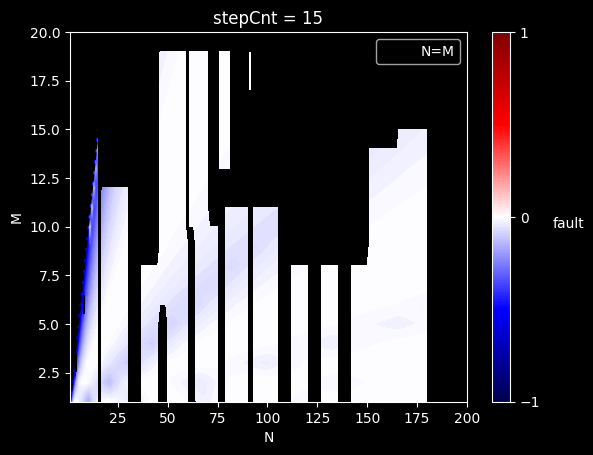

In [25]:
equationMaps = []
NRange = 200
MRange = 20
NRange_initial = 20
MRange_initial = 20
NRange_enlargener = 15
MRange_enlargener = 15

for stepCnt in range(15):
    #define formula recursively
    #a0 = 1/sqrt(N)
    #a{stepCnt+1} = 1/sqrt(M)
    a = [1/sp.sqrt(N)]
    for i in range(stepCnt+1):
        form = aip1.subs(ai, a[i])
        a.append(form)
    #set up the equation with a[-1] = 1/sqrt(M)
    eq = a[-1] - 1/sp.sqrt(M)
    if stepCnt <= 1:
        display(Math(sp.latex(eq) + " = 0"))
    else:
        print("eq too long to display...")
    #plot the value of the equation for different values of N and M
    
    def evaluationLoop(eqs,initialVals,enlargenerVals,rangeVals):
        currentVals = initialVals
        print(currentVals)
        NRange = np.linspace(1, rangeVals[0], rangeVals[0], dtype=int)
        MRange = np.linspace(1, rangeVals[1], rangeVals[1], dtype=int)
        NRange, MRange = np.meshgrid(NRange, MRange)
        resultMap = np.empty((rangeVals[1],rangeVals[0]))
        resultMap[:] = np.nan
        evaluationPoints = [[enlargenerVals[0]//2+1,enlargenerVals[1]//2+1]]
        while currentVals[0] < rangeVals[0] or currentVals[1] < rangeVals[1]:
            for i,evalPoint in list(enumerate(evaluationPoints))[::-1]:
                print("evalPoint: " + str(evalPoint))
                Ns = np.linspace(evalPoint[0]-enlargenerVals[0]//2, evalPoint[0]+enlargenerVals[0]//2, enlargenerVals[0]+1)
                Ms = np.linspace(evalPoint[1]-enlargenerVals[1]//2, evalPoint[1]+enlargenerVals[1]//2, enlargenerVals[1]+1)
                print("Lower left: " + str([Ns[0],Ms[0]]))
                print("Upper right: " + str([Ns[-1],Ms[-1]]))
                #remove points that are outside the range
                Ms = Ms[Ns < rangeVals[0]]
                Ns = Ns[Ns < rangeVals[0]]
                Ms = Ms[Ns > 0]
                Ns = Ns[Ns > 0]
                Ns = Ns[Ms < rangeVals[1]]
                Ms = Ms[Ms < rangeVals[1]]
                Ns = Ns[Ms > 0]
                Ms = Ms[Ms > 0]
                if len(Ns) == 0:
                    evaluationPoints.pop(i)
                    continue
                print("Lower left: " + str([Ns[0],Ms[0]]))
                print("Upper right: " + str([Ns[-1],Ms[-1]]))
                Ns, Ms = np.meshgrid(Ns, Ms)
                Ns = Ns.astype(int)
                Ms = Ms.astype(int)
                #only keep the Ns and Ms that haven't been evaluated yet
                NNans = np.isnan(resultMap[Ms-1,Ns-1])
                Ns = Ns[NNans]
                Ms = Ms[NNans]
                print("Lower left: " + str([Ns[0],Ms[0]]))
                print("Upper right: " + str([Ns[-1],Ms[-1]]))
                
                if len(Ns) == 0:
                    evaluationPoints.pop(i)
                    continue
                #evaluate the equation at the points
                evaluated = eqs(Ns, Ms)
                #make sure the values are between -1 and 1
                evaluated[evaluated < -1] = -1
                evaluated[evaluated > 1] = 1
                #find the correct mapping from Ns and Ms to the resultMap
                Ns_indecies = Ns.astype(int)
                Ms_indecies = Ms.astype(int)
                resultMap[Ms_indecies-1,Ns_indecies-1] = evaluated
            #find the next evaluation point by finding linear relations and setting evaluationPoints to the tips of those
            print(linearEvaluation := locateOptimumLineBySlicing(NRange,MRange,resultMap))
            if len(linearEvaluation[0]) == 0:
                extraPoints = []
                for i in range(len(evaluationPoints)):
                    extraPoints.append([
                        evaluationPoints[i][0]+enlargenerVals[0],
                        evaluationPoints[i][1]
                    ])
                    extraPoints.append([
                        evaluationPoints[i][0],
                        evaluationPoints[i][1]+enlargenerVals[1]
                    ])
                    evaluationPoints[i][0] += enlargenerVals[0]
                    evaluationPoints[i][1] += enlargenerVals[1]
                evaluationPoints += extraPoints
            else:
                #init evaluationPoints with just M=1 and N=max{Ns}
                maxNM = [0,0]
                for point in evaluationPoints:
                    if point[0] > maxNM[0]:
                        maxNM[0] = point[0]
                    if point[1] > maxNM[1]:
                        maxNM[1] = point[1]
                maxNM[0], maxNM[1] = maxNM[0]+enlargenerVals[0], maxNM[1]+enlargenerVals[1]
                evaluationPoints = [[maxNM[0],1]]
                for linearsSets in linearEvaluation[0]:
                    point2 = np.array([linearsSets[0][-1],linearsSets[1][-1]])
                    point1 = np.array([linearsSets[0][0],linearsSets[1][0]])
                    delta = point2 - point1
                    a = delta[1]/delta[0]
                    b = point1[1] - a*point1[0]
                    maxM = a*maxNM[0] + b
                    maxN = (maxNM[1] - b)/a
                    newPoint = [maxNM[0],maxM]
                    evaluationPoints.append(newPoint)
            print("Evaluationpoints: " + str(evaluationPoints))
            #remove repeated points
            newSet = []
            for point in evaluationPoints:
                if point not in newSet:
                    newSet.append(point)
            evaluationPoints = newSet

            currentVals = [currentVals[0]+enlargenerVals[0],currentVals[1]+enlargenerVals[1]]
            print(currentVals)
        return resultMap, NRange, MRange

    #make eq a function of N and M
    with warnings.catch_warnings(record=True) as warn:
        warnings.simplefilter("always")
        eqs = sp.lambdify((N, M), eq, "numpy")
        evaluated, Ns, Ms = evaluationLoop(eqs,[NRange_initial,MRange_initial],[NRange_enlargener,MRange_enlargener],[NRange,MRange])
        warnMsgs = []
        for w in warn:
            if str(w.message) not in warnMsgs:
                warnMsgs.append(str(w.message))
                print(w.message)
            assert issubclass(w.category, RuntimeWarning)
    #plot with seismic colormap
    plt.figure()
    toPlot = evaluated#(evaluated+1)/2
    #contourplot with minimum at -1 and maximum at 1
    print(toPlot.shape)
    print(Ns.shape)
    print(Ms.shape)
    plt.contourf(Ns, Ms, toPlot, 100, cmap="seismic", vmin=-1, vmax=1)
    cMap = plt.cm.get_cmap("seismic")
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=-1, vmax=1), cmap=cMap), ticks=[-1,0,1])
    cbar.set_label('fault', rotation=0, labelpad=20)
    #cbar = plt.colorbar(plt.cm.ScalarMappable(cmap="PiYG"))
    #insert a N=M line
    plt.plot([1, NRange], [1, NRange], color="black", linestyle="--", label="N=M")
    #plot
    plt.legend()
    plt.xlim(1, NRange)
    plt.ylim(1, MRange)
    plt.title("stepCnt = " + str(stepCnt+1))
    plt.xlabel("N")
    plt.ylabel("M")
    plt.show()
    #save the equation map
    equationMaps.append(evaluated)

In [ ]:
wholeStepLines = []
for stepC in range(1,stepCnt+2):
    mapAtStep = equationMaps[stepC-1]
    #foundPoints = locateOptimumLineWithStartPoint(Ns,Ms,mapAtStep,startCord)
    endM = 1
    i = 0
    foundPoints = {}
    while endM < 0.9*MRange and endM != 0:
        #calc cuttoffindex by endM
        MSlice = Ms[:,0]
        cuttoff = np.where(MSlice == endM)
        while True:
            try:
                cuttoff[0]
                cuttoff = cuttoff[0]
            except:
                break
        cuttoff += 1
        foundPoints[i], endM = locateOptimumLineBySlicing(Ns[cuttoff:],Ms[cuttoff:],mapAtStep[cuttoff:])
        i += 1
    #seperate foundPoints in x and y
    #plot
    plt.figure()
    plt.contourf(Ns, Ms, mapAtStep, 100, cmap="seismic", vmin=-1, vmax=1)
    cMap = plt.cm.get_cmap("seismic")
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=-1, vmax=1), cmap=cMap), ticks=[-1,0,1])
    cbar.set_label('fault', rotation=0, labelpad=20)
    #plot found points
    for k in foundPoints.keys():
        for i in range(len(foundPoints[k])):
            label = "wholestep" if i == 0 and k == 0 else None
            plt.plot(foundPoints[k][i][0], foundPoints[k][i][1], color="red", linestyle="--", label=label)
    #insert a N=M line
    plt.plot([1, NRange], [1, NRange], color="black", linestyle="--", label="N=M")
    #plot
    plt.legend()
    plt.xlim(1, NRange)
    plt.ylim(1, MRange)
    plt.title("stepCnt = " + str(stepC))
    plt.xlabel("N")
    plt.ylabel("M")
    plt.show()
    #save found points
    wholeStepLines.append(foundPoints)

TypeError: only integer scalar arrays can be converted to a scalar index

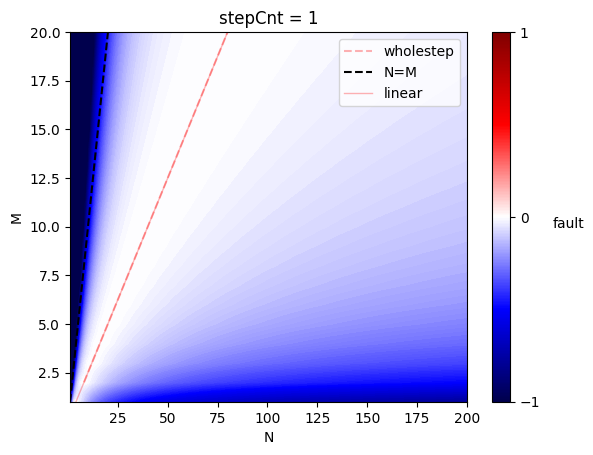

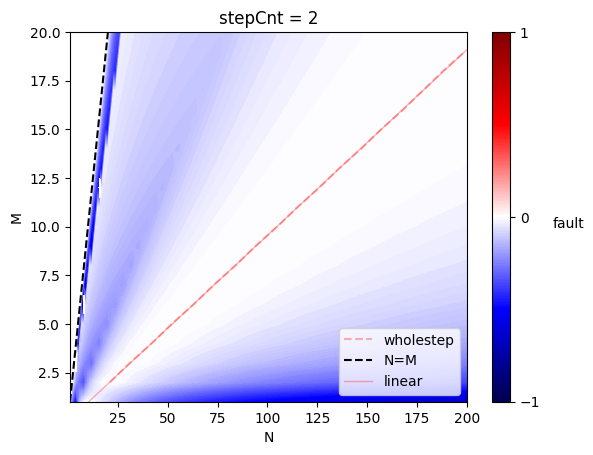

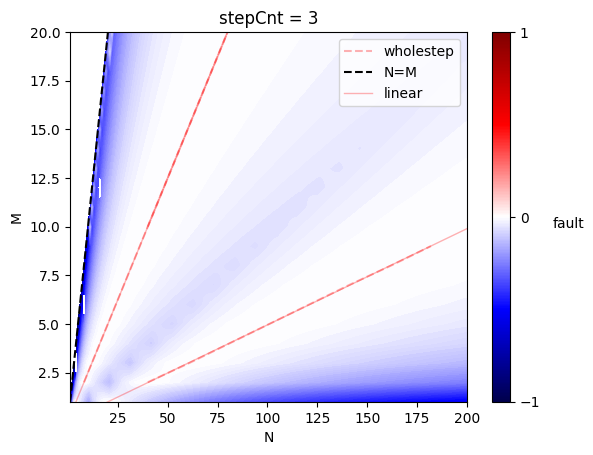

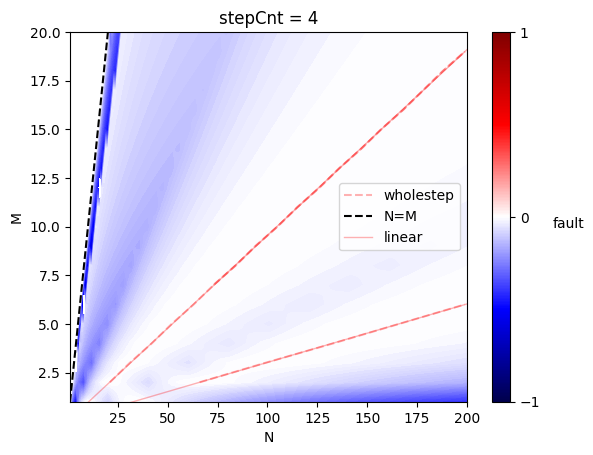

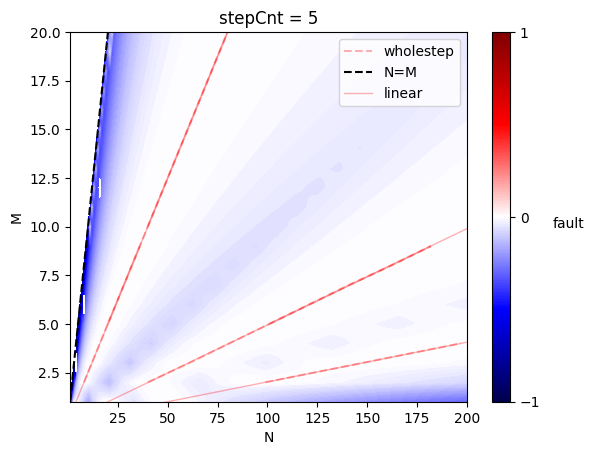

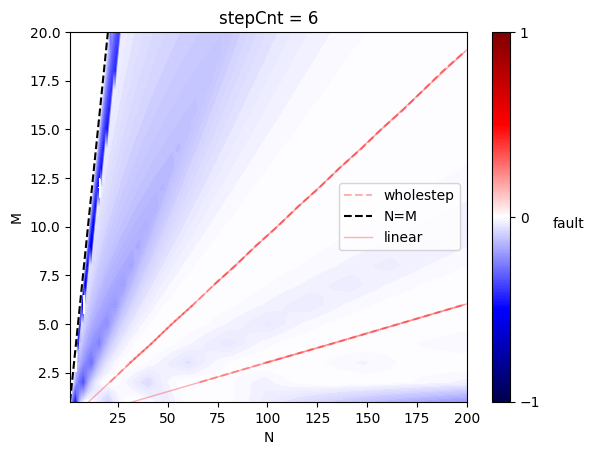

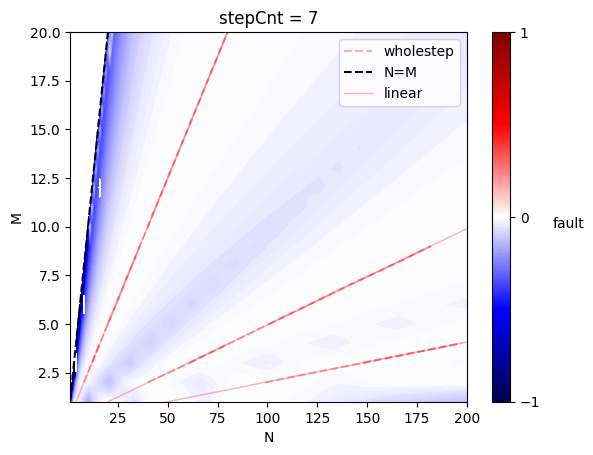

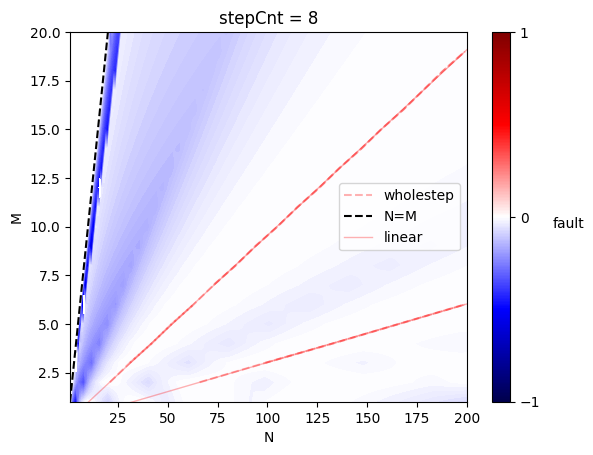

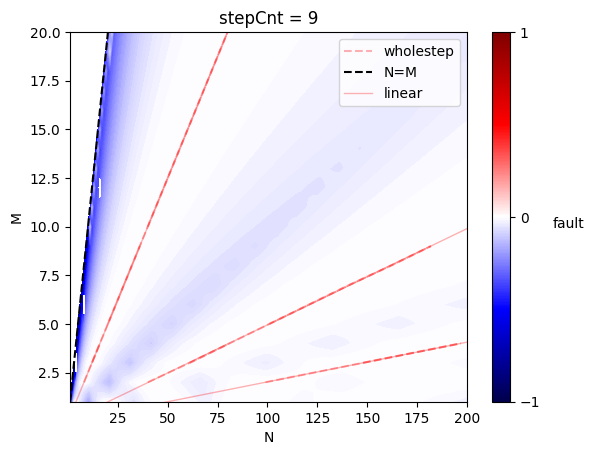

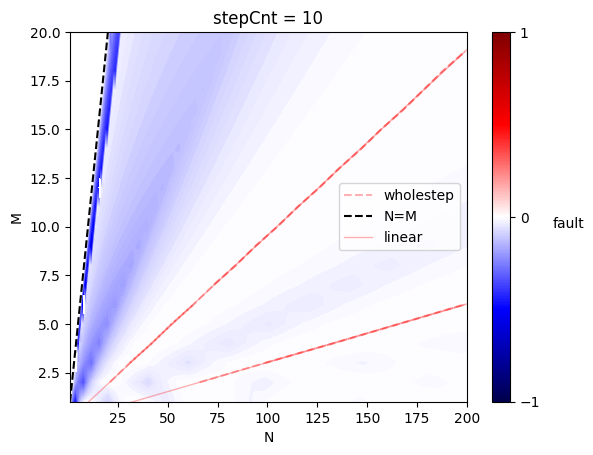

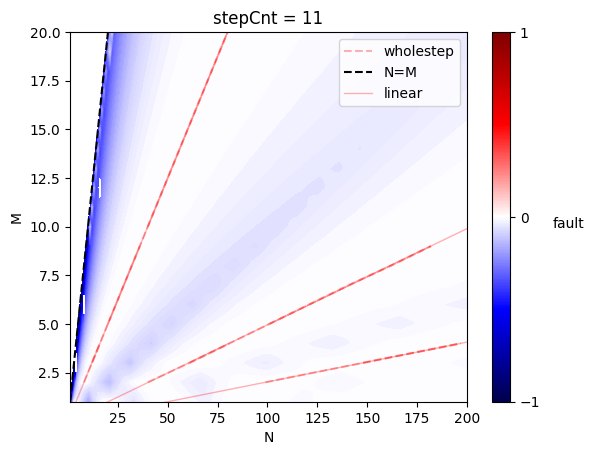

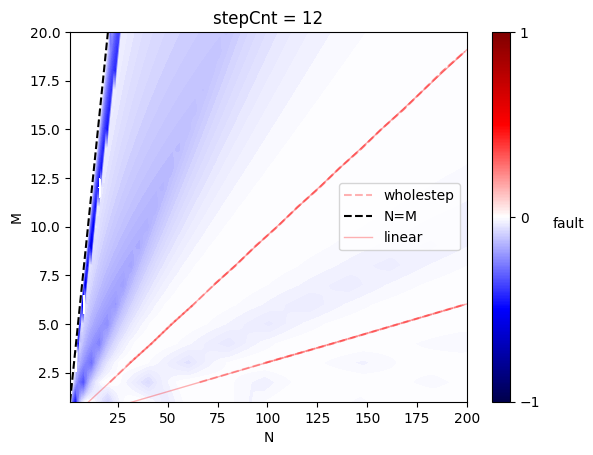

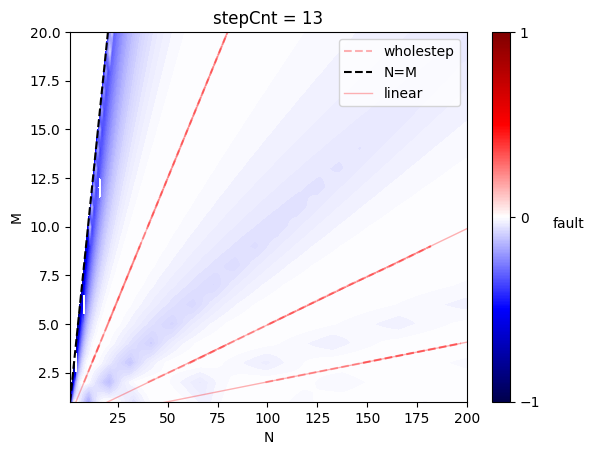

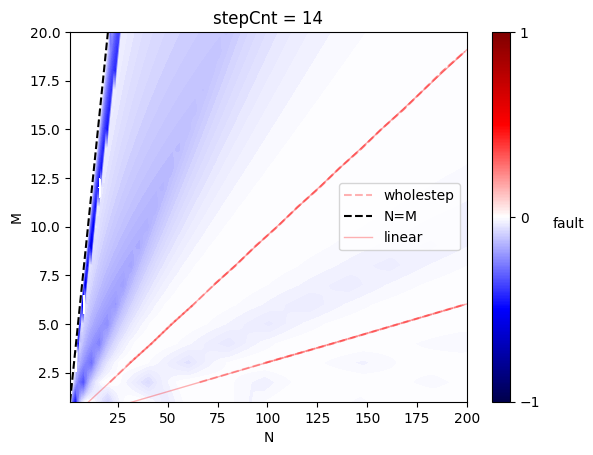

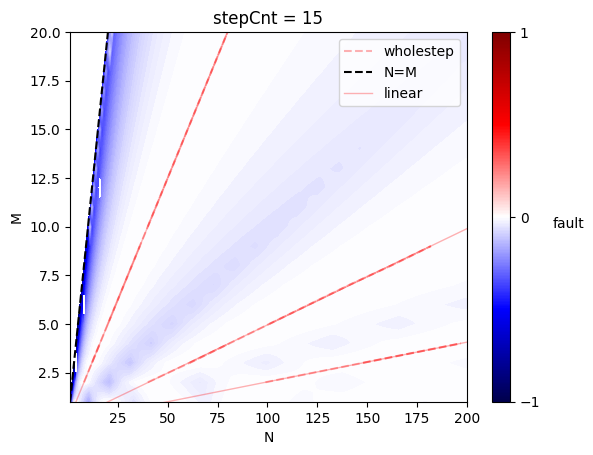

In [ ]:
#! making assumption of linear relation between N and M for the whole step
#find linear relation between N and M for each step
wholeStepLinesLinear = []
for stepC in range(1,stepCnt+2):
    foundPoints = wholeStepLines[stepC-1]
    #using only the first set of found points
    lineList = []
    #print("stepC = " + str(stepC))
    for k in foundPoints.keys():
        #print("k = " + str(k))
        #print("shape = " + str(np.shape(foundPoints[k])))
        if k == 0:
            lineList = foundPoints[k]
        else:
            for i in range(len(foundPoints[k])):
                lineList[i][0] = list(lineList[i][0])
                lineList[i][1] = list(lineList[i][1])
                lineList[i][0] = lineList[i][0] + list(foundPoints[k][i][0])
                lineList[i][1] = lineList[i][1] + list(foundPoints[k][i][1])
    foundPointsLinear = []
    for i in range(len(lineList)):
        #find linear relation between N and M
        N = lineList[i][0]
        M = lineList[i][1]
        #check if there are too few points
        if len(N) <= 2:
            continue
        #find linear relation between N and M
        p = np.polyfit(N, M, 1)
        foundPointsLinear.append(p)
    wholeStepLinesLinear.append(foundPointsLinear)

    #plot
    plt.figure()
    mapAtStep = equationMaps[stepC-1]
    plt.contourf(Ns, Ms, mapAtStep, 100, cmap="seismic", vmin=-1, vmax=1)
    cMap = plt.cm.get_cmap("seismic")
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=-1, vmax=1), cmap=cMap), ticks=[-1,0,1])
    cbar.set_label('fault', rotation=0, labelpad=20)
    #plot found points
    for k in foundPoints.keys():
        for i in range(len(foundPoints[k])):
            label = "wholestep" if i == 0 and k == 0 else None
            plt.plot(foundPoints[k][i][0], foundPoints[k][i][1], color="red", linestyle="--", label=label, alpha=0.3)
    #insert a N=M line
    plt.plot([1, NRange], [1, NRange], color="black", linestyle="--", label="N=M")
    #insert linear relation
    for i in range(len(foundPointsLinear)):
        p = foundPointsLinear[i]
        x = np.array([1, NRange])
        y = p[0]*x + p[1]
        plt.plot(x, y, color="red",alpha=0.3, linewidth=1, label="linear" if i == 0 else None)
    #plot
    plt.legend()
    plt.xlim(1, NRange)
    plt.ylim(1, MRange)
    plt.title("stepCnt = " + str(stepC))
    plt.xlabel("N")
    plt.ylabel("M")
    plt.show()
    #save found points
    wholeStepLines.append(foundPoints)

In [ ]:
#for each whole-number combination of N and M, find the nearest point on the lines, and save the distance
#get every wholenumber cord in the n and m range
NInts = np.arange(1,NRange+1)
MInts = np.arange(1,MRange+1)
NInts, MInts = np.meshgrid(NInts, MInts)
distances = []
cord2BestDist = []
for stepToTest in range(1,stepCnt+2):
    distances.append(np.zeros(NInts.shape))
    cord2BestDist.append(np.copy(distances[-1]).tolist())
    for iInt in range(len(NInts)):
        for jInt in range(len(NInts[i])):
            NInt = NInts[iInt][jInt]
            MInt = MInts[iInt][jInt]
            #find the nearest point on the lines
            for l in range(len(wholeStepLinesLinear[stepToTest-1])):
                p = wholeStepLinesLinear[stepToTest-1][l]
                #find the distance between the point and the line
                dist = abs(p[0]*NInt - MInt + p[1])/np.sqrt(p[0]**2 + 1)
                if l == 0:
                    bestDist = dist
                    bestLine = l
                    bestCord = [NInt, MInt]
                else:
                    if dist < bestDist:
                        bestDist = dist
                        bestLine = l
                        bestCord = [NInt, MInt]
            #save distance
            distances[stepToTest-1][iInt][jInt] = bestDist
            cord2BestDist[stepToTest-1][iInt][jInt] = [bestLine, bestCord]
    """#plot
    toPlot = -distances[stepToTest-1]
    plt.figure()
    plt.contourf(NInts, MInts, toPlot, 100, cmap="seismic", vmin=-2, vmax=2)
    cMap = plt.cm.get_cmap("seismic")
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=0, vmax=5), cmap=cMap), ticks=[0,10])
    cbar.set_label('fault', rotation=0, labelpad=20)
    #plot N=M line
    plt.plot([1, NRange], [1, NRange], color="black", linestyle="--", label="N=M")
    #plot the linear relations
    for i in range(len(wholeStepLinesLinear[stepToTest-1])):
        p = wholeStepLinesLinear[stepToTest-1][i]
        x = np.array([1, NRange])
        y = p[0]*x + p[1]
        plt.plot(x, y, color="red", alpha=1, linestyle="--", linewidth=1, label="linear" if i == 0 else None)
    #insert all whole number points as red plusses
    flatNInts = NInts.flatten()
    flatMInts = MInts.flatten()
    plt.plot(flatNInts, flatMInts, color="red", marker=".", linestyle="None", label="whole number points")
    #plot
    plt.xlim(1, NRange)
    plt.ylim(1, MRange)
    plt.title("stepCnt = " + str(stepToTest))
    plt.xlabel("N")
    plt.ylabel("M")
    plt.show()"""
                    
            

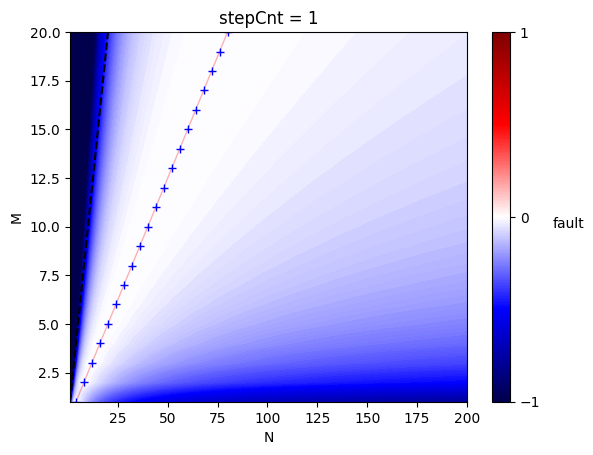

Crossings {N,M}: [[4.0, 1], [8.0, 2], [12.0, 3], [16.0, 4], [20.0, 5], [24.0, 6], [28.0, 7], [32.0, 8], [36.0, 9], [40.0, 10], [44.0, 11], [48.0, 12], [52.0, 13], [56.0, 14], [60.0, 15], [64.0, 16], [68.0, 17], [72.0, 18], [76.0, 19], [80.0, 20]]


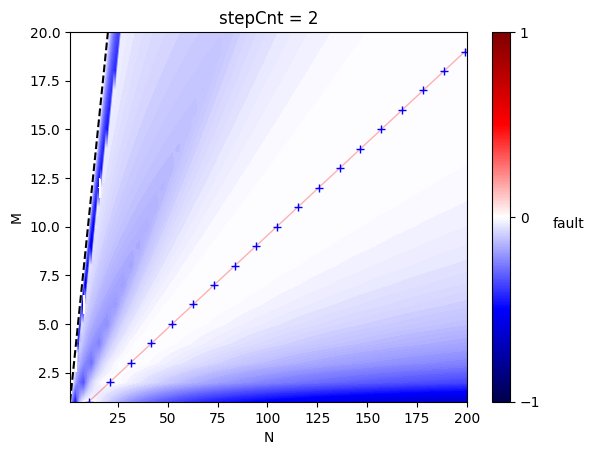

Crossings {N,M}: [[10.383, 1], [20.863, 2], [31.343, 3], [41.823, 4], [52.304, 5], [62.784, 6], [73.264, 7], [83.744, 8], [94.224, 9], [104.704, 10], [115.185, 11], [125.665, 12], [136.145, 13], [146.625, 14], [157.105, 15], [167.585, 16], [178.065, 17], [188.546, 18], [199.026, 19]]


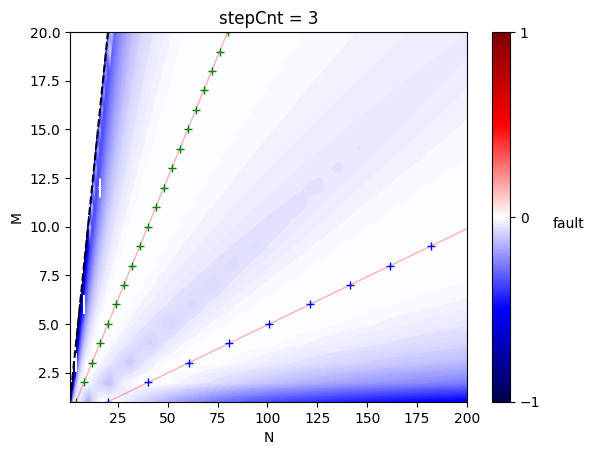

Crossings {N,M}: [[20.103, 1], [40.33, 2], [60.557, 3], [80.784, 4], [101.011, 5], [121.239, 6], [141.466, 7], [161.693, 8], [181.92, 9]]


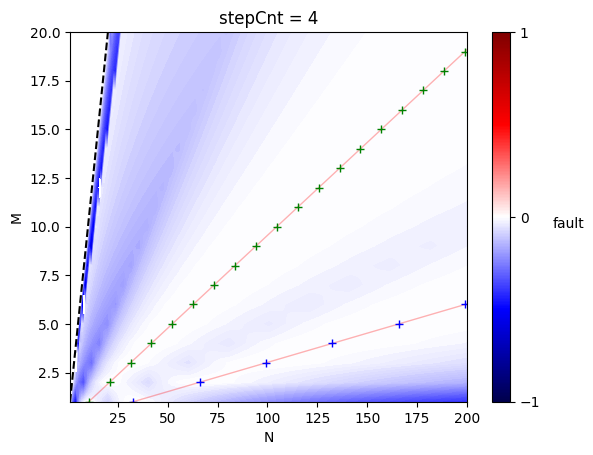

Crossings {N,M}: [[32.697, 1], [65.998, 2], [99.299, 3], [132.6, 4], [165.901, 5], [199.202, 6]]


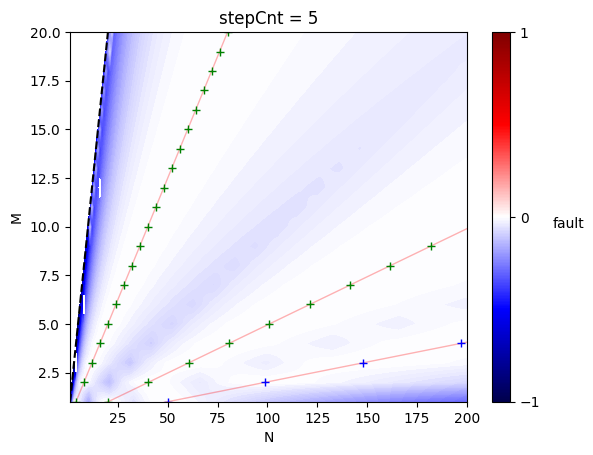

Crossings {N,M}: [[50.0, 1], [99.0, 2], [148.0, 3], [197.0, 4]]


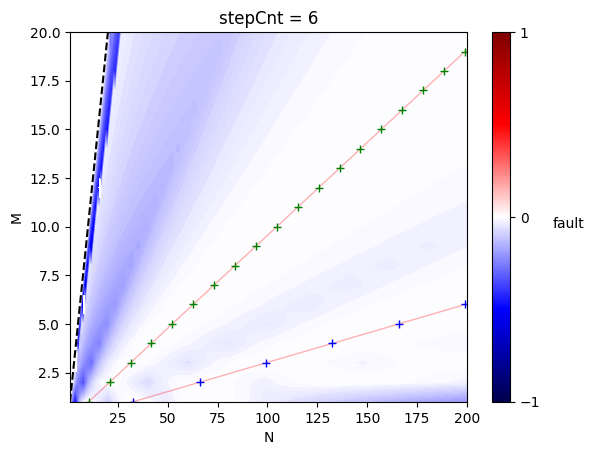

Crossings {N,M}: [[32.697, 1], [65.998, 2], [99.299, 3], [132.6, 4], [165.901, 5], [199.202, 6]]


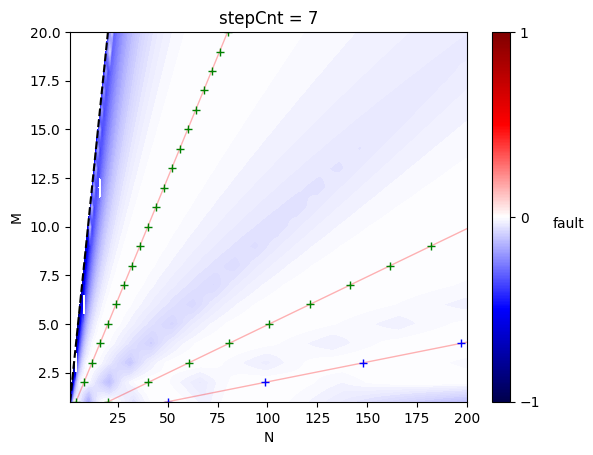

Crossings {N,M}: [[50.0, 1], [99.0, 2], [148.0, 3], [197.0, 4]]


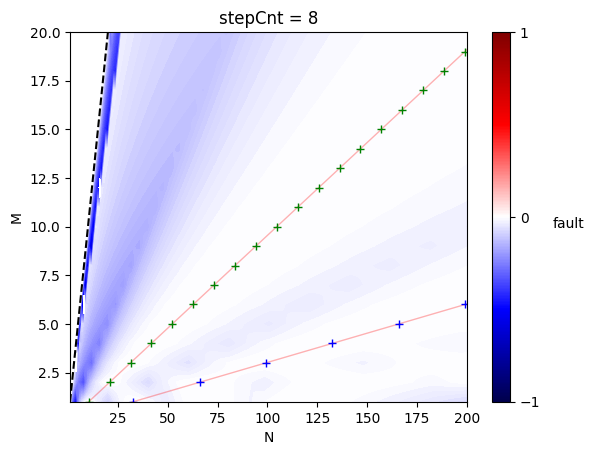

Crossings {N,M}: [[32.697, 1], [65.998, 2], [99.299, 3], [132.6, 4], [165.901, 5], [199.202, 6]]


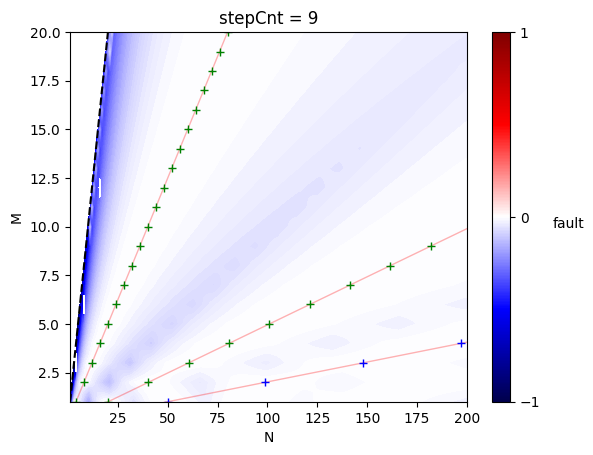

Crossings {N,M}: [[50.0, 1], [99.0, 2], [148.0, 3], [197.0, 4]]


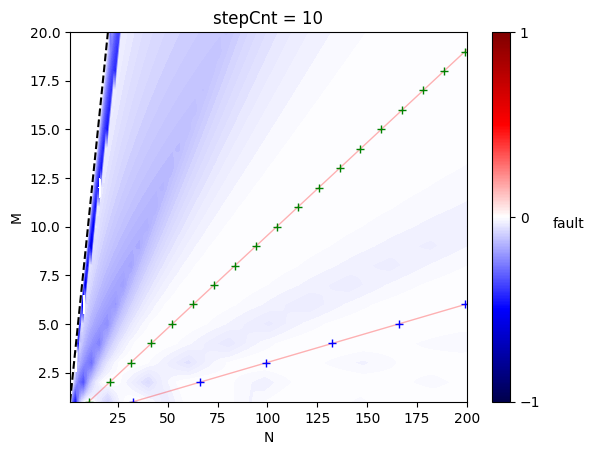

Crossings {N,M}: [[32.697, 1], [65.998, 2], [99.299, 3], [132.6, 4], [165.901, 5], [199.202, 6]]


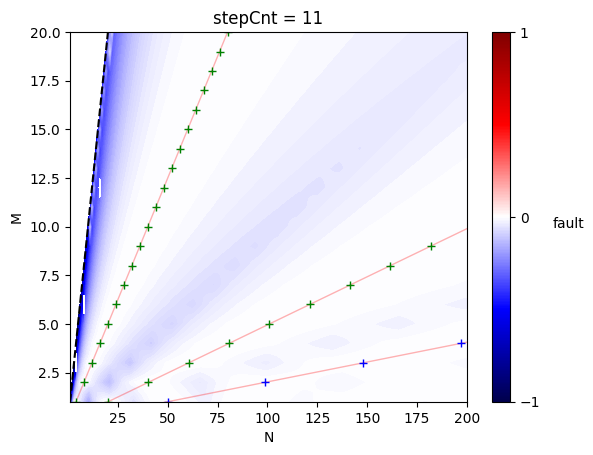

Crossings {N,M}: [[50.0, 1], [99.0, 2], [148.0, 3], [197.0, 4]]


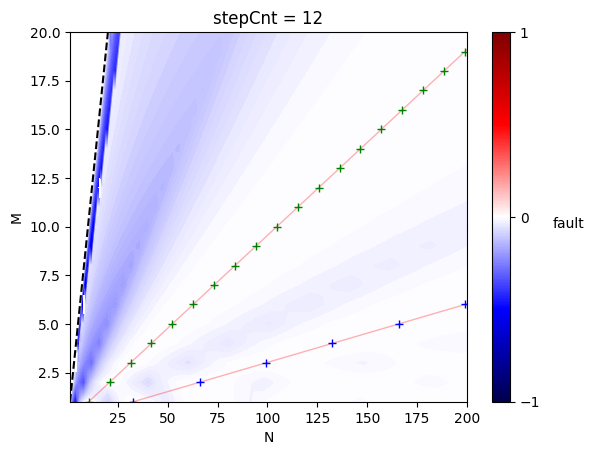

Crossings {N,M}: [[32.697, 1], [65.998, 2], [99.299, 3], [132.6, 4], [165.901, 5], [199.202, 6]]


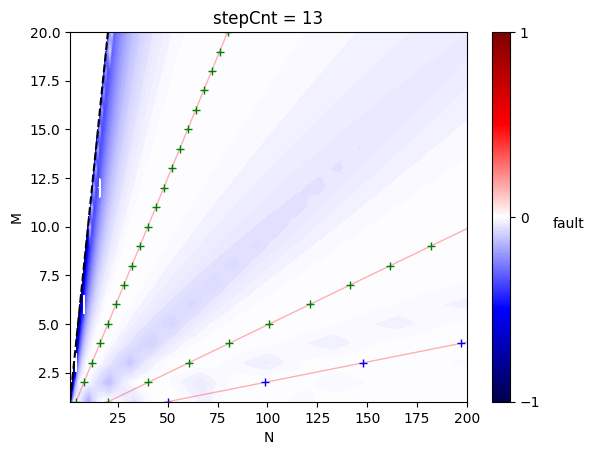

Crossings {N,M}: [[50.0, 1], [99.0, 2], [148.0, 3], [197.0, 4]]


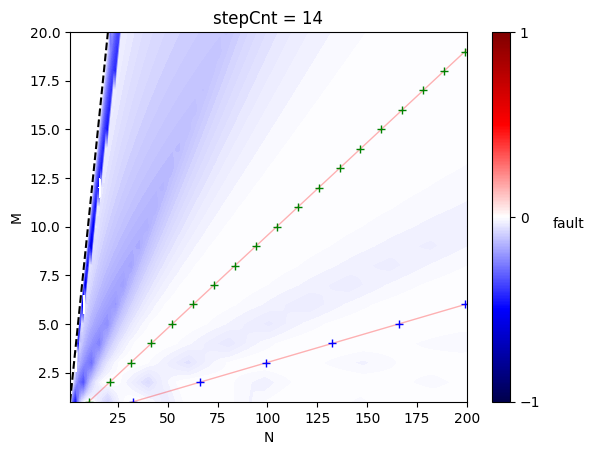

Crossings {N,M}: [[32.697, 1], [65.998, 2], [99.299, 3], [132.6, 4], [165.901, 5], [199.202, 6]]


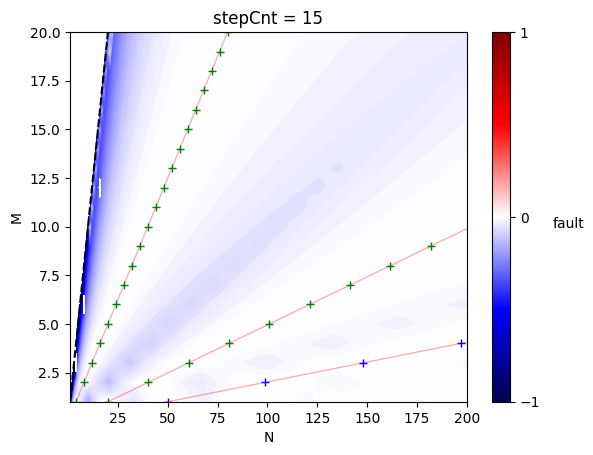

Crossings {N,M}: [[50.0, 1], [99.0, 2], [148.0, 3], [197.0, 4]]


In [ ]:
#!aproximating Ns to not have to be whole numbers
#find and mark all crossings between whole number Ms and the linear relations
foundCrossings = []
foundGoodCrossings = []
for stepC in range(1,stepCnt+2):
    #find all crossings
    crossings = []
    goodCrossings = []
    for i in range(len(wholeStepLinesLinear[stepC-1])):
        p = wholeStepLinesLinear[stepC-1][i]
        #append points where the resulting M is a whole number
        for MInt in range(1,MRange+1):
            #find N of MInt = p[0]*N + p[1]
            NSol = (MInt - p[1])/p[0]
            if NSol >= 1 and NSol <= NRange:
                if i != len(wholeStepLinesLinear[stepC-1])-1:
                    crossings.append([round(NSol,3), MInt])
                else:
                    goodCrossings.append([round(NSol,3), MInt])
    foundCrossings.append(crossings)
    foundGoodCrossings.append(goodCrossings)
    #plot
    plt.figure()
    mapAtStep = equationMaps[stepC-1]
    plt.contourf(Ns, Ms, mapAtStep, 100, cmap="seismic", vmin=-1, vmax=1)
    cMap = plt.cm.get_cmap("seismic")
    cbar = plt.colorbar(plt.cm.ScalarMappable(norm=plt.Normalize(vmin=-1, vmax=1), cmap=cMap), ticks=[-1,0,1])
    cbar.set_label('fault', rotation=0, labelpad=20)
    #plot N=M line
    plt.plot([1, NRange], [1, NRange], color="black", linestyle="--", label="N=M")
    #insert linear relation
    for i in range(len(wholeStepLinesLinear[stepC-1])):
        p = wholeStepLinesLinear[stepC-1][i]
        x = np.array([1, NRange])
        y = p[0]*x + p[1]
        plt.plot(x, y, color="red",alpha=0.3, linewidth=1, label="linear" if i == 0 else None)
    #insert all crossings as blue plusses
    for i in range(len(crossings)):
        plt.plot(crossings[i][0], crossings[i][1], color="green", marker="+", linestyle="None", label="crossings" if i == 0 else None)
    for i in range(len(goodCrossings)):
        plt.plot(goodCrossings[i][0], goodCrossings[i][1], color="blue", marker="+", linestyle="None", label="good crossings" if i == 0 else None)
    #plot
    plt.xlim(1, NRange)
    plt.ylim(1, MRange)
    plt.title("stepCnt = " + str(stepC))
    plt.xlabel("N")
    plt.ylabel("M")
    plt.show()
    #print found crossings
    print("Crossings {N,M}: " + str(foundGoodCrossings[stepC-1]))

Binary possible Ns table: 
1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152, 4194304, 8388608, 16777216, 33554432, 67108864, 134217728, 268435456, 536870912, 1073741824, 2147483648, 4294967296, 8589934592, 17179869184, 34359738368, 68719476736, 137438953472, 274877906944, 549755813888, 1099511627776, 2199023255552, 4398046511104, 8796093022208, 17592186044416, 35184372088832, 70368744177664, 140737488355328, 281474976710656, 562949953421312, 
Modified Grovers pointsets: 
[[0, 40, 10, 0.0], [1, 10, 1, 0.383]]
[[0, 80, 20, 0.0], [2, 20, 1, 0.103]]
[[1, 42, 4, 0.177], [0, 4, 1, 0.0]]
[[1, 84, 8, 0.256], [0, 8, 2, 0.0]]
[[1, 126, 12, 0.335], [0, 12, 3, 0.0]]
[[1, 168, 16, 0.415], [0, 16, 4, 0.0]]
[[2, 81, 4, 0.216], [0, 4, 1, 0.0]]
[[2, 162, 8, 0.307], [0, 8, 2, 0.0]]
[[3, 133, 4, 0.4], [0, 4, 1, 0.0]]
[[4, 197, 4, 0.0], [0, 4, 1, 0.0]]
[[5, 133, 4, 0.4], [0, 4, 1, 0.0]]
[[6, 197, 4, 0.0], [0, 4, 1, 0.0]]
[[7, 133,

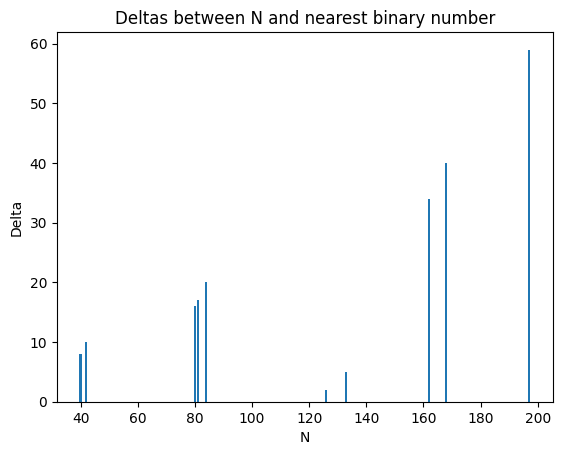

In [ ]:
print("Binary possible Ns table: ")
table = [1]
tja = 1
for i in range(50):
    print(f"{str(tja)}, ", end="")
    tja *= 2
    table.append(tja)
print()
#find Ms points with M that has a whole number N solution in some other set of points
modifiedGroversPointsets = []
possibleStates = []
for i in range(len(foundGoodCrossings)):
    for j in range(len(foundGoodCrossings[i])):
        M = foundGoodCrossings[i][j][1]
        for k in range(len(foundGoodCrossings)):
            if k != i:
                for l in range(len(foundGoodCrossings[k])):
                    N = foundGoodCrossings[k][l][0]
                    if round(N) == M:
                        error2 = round(abs(N - M),3)
                        error1 = round(abs(foundGoodCrossings[i][j][0] - round(foundGoodCrossings[i][j][0])),3)
                        cord1 = [i] + np.round(foundGoodCrossings[i][j]).astype(int).tolist() + [error1]
                        cord2 = [k] + np.round(foundGoodCrossings[k][l]).astype(int).tolist() + [error2]
                        modifiedGroversPointsets.append([cord1, cord2])
                        if cord1[1] in table:
                            possibleStates.append(cord1)
print("Modified Grovers pointsets: ")
for i in range(len(modifiedGroversPointsets)):
    print(str(modifiedGroversPointsets[i]))
print("Possible states: ")
for i in range(len(possibleStates)):
    print(str(possibleStates[i]))
#plot as a histogram the deltavalue of modifiedGroversPointsets[:,0,1] to the nearest number in table
deltas = []
for i in range(len(modifiedGroversPointsets)):
    N = modifiedGroversPointsets[i][0][1]
    deltas.append([N,abs(N - table[0])])
    for j in range(len(table)):
        if abs(N - table[j]) < deltas[i][1]:
            deltas[i] = [N,abs(N - table[j])]
deltas = np.array(deltas).T
print("Deltas between N and nearest binary number: ")
print(deltas)
plt.figure()
plt.bar(deltas[0], deltas[1])
plt.title("Deltas between N and nearest binary number")
plt.xlabel("N")
plt.ylabel("Delta")
plt.show()

